In [50]:
import sys
import numpy as np
sys.path.append("../utils")
from mujoco_parser import MuJoCoParserClass
from util import MultiSliderClass,get_idxs

In [51]:
xml_path = '../asset/kimlab_dualarms/scene_dualarms.xml'
robot_env = MuJoCoParserClass(name='Dual Arms',rel_xml_path=xml_path,VERBOSE=False)
robot_env.set_geom_color(
    rgba                = (0.2,0.2,1.0,0.9),
    body_names_to_color = [
        'robot1/end_link','robot1/index_L1','robot1/index_L2','robot1/index_tip',
        'robot1/middle_L1','robot1/middle_L2','robot1/middle_tip',
        'robot1/ring_L1','robot1/ring_L2','robot1/ring_tip',
        'robot1/pinky_L1','robot1/pinky_L2','robot1/pinky_tip',
        'robot1/thumb_L1','robot1/thumb_L2','robot1/thumb_tip'],
)
robot_env.set_geom_color(
    rgba                = (1.0,0.2,0.2,0.9),
    body_names_to_color = [
        'robot2/end_link','robot2/index_L1','robot2/index_L2','robot2/index_tip',
        'robot2/middle_L1','robot2/middle_L2','robot2/middle_tip',
        'robot2/ring_L1','robot2/ring_L2','robot2/ring_tip',
        'robot2/pinky_L1','robot2/pinky_L2','robot2/pinky_tip',
        'robot2/thumb_L1','robot2/thumb_L2','robot2/thumb_tip'],
)

In [60]:
q_init = robot_env.data.qpos.copy()
q_init[18] = -np.pi/2
robot_env.forward(q=q_init)

robot_shoulder_pos = robot_env.get_p_joint('robot2/joint1')
robot_wrist_pos = robot_env.get_p_joint('robot2/joint6')

robot_arm_length = np.linalg.norm(robot_shoulder_pos-robot_wrist_pos)
print(robot_arm_length)

0.6779999999999998


In [17]:
ROBOT_RIGHT_ARM_JOINT_NAMES = ['robot2/joint1','robot2/joint2','robot2/joint3','robot2/joint4','robot2/joint5']
ROBOT_RIGHT_ARM_IDXS = get_idxs(robot_env.joint_names,ROBOT_RIGHT_ARM_JOINT_NAMES)
ROBOT_RIGHT_ARM_JOINT_MAXS = robot_env.rev_joint_maxs[ROBOT_RIGHT_ARM_IDXS]
ROBOT_RIGHT_ARM_JOINT_MINS = robot_env.rev_joint_mins[ROBOT_RIGHT_ARM_IDXS]

ROBOT_RIGHT_ARM_JOINT_MAXS = np.floor(ROBOT_RIGHT_ARM_JOINT_MAXS)
ROBOT_RIGHT_ARM_JOINT_MINS = np.ceil(ROBOT_RIGHT_ARM_JOINT_MINS)

from itertools import product

dimensions = []
for min_val, max_val in zip(ROBOT_RIGHT_ARM_JOINT_MINS, ROBOT_RIGHT_ARM_JOINT_MAXS):
    dim_values = np.arange(min_val, max_val + 2/3, 2/3)
    dimensions.append(dim_values)

grid_points = np.array(list(product(*dimensions)))
print(grid_points.shape)

(7840, 5)


In [21]:
robot_env.reset() # reset

# Initialize MuJoCo viewer
robot_env.init_viewer(
    viewer_title='Dualarms',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
robot_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)
wrist_pos_list = []
point_number = 0

# Reset and loop
robot_env.reset()
while robot_env.is_viewer_alive() and point_number < len(grid_points):
    q_random = grid_points[point_number]
    robot_env.forward(q=q_random,joint_idxs=ROBOT_RIGHT_ARM_IDXS,INCREASE_TICK=True) # FK
    wrist_pos = robot_env.get_p_joint('robot2/joint6')
    wrist_pos_list.append(wrist_pos)
    wrist_pos_array = np.array(wrist_pos_list)

    # Render
    # robot_env.plot_T(p=np.zeros(3),R=np.eye(3,3),
    #             PLOT_AXIS=True,axis_len=0.5,axis_width=0.005)
    # robot_env.plot_T(p=np.array([0,0,0.5]),R=np.eye(3),PLOT_AXIS=False,
    #             label='Tick:[%d]'%(point_number))
    # robot_env.plot_traj(wrist_pos_array,rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    # robot_env.render()

    point_number += 1
    if point_number % 1000 == 0: print('point_number:',point_number)
        
robot_env.close_viewer()

point_number: 1000
point_number: 2000
point_number: 3000
point_number: 4000
point_number: 5000
point_number: 6000
point_number: 7000


In [22]:
robot_env.reset() # reset

# Initialize MuJoCo viewer
robot_env.init_viewer(
    viewer_title='Dualarms',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
robot_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)

while robot_env.is_viewer_alive():
    robot_env.plot_traj(wrist_pos_array,rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    robot_env.render()

robot_env.close_viewer()

Pressed ESC
Quitting.


In [24]:
xml_path = '../asset/smplh_rig/scene_smplh_rig.xml'
smplh_env = MuJoCoParserClass(name='Common-Rig',rel_xml_path=xml_path,VERBOSE=False)
# Modify the color of body exluding 'world'
for body_name in smplh_env.body_names:
    if body_name in ['world']: continue
    for geom_idx in smplh_env.get_geom_idxs_from_body_name(body_name=body_name):
        smplh_env.model.geom(geom_idx).rgba = [0.3,0.3,0.5,1]
print ("Done.")

Done.


In [57]:
smplh_shoulder_pos = smplh_env.get_p_joint('r_shoulder1')
smplh_wrist_pos = smplh_env.get_p_joint('r_wrist1')

smplh_arm_length = np.linalg.norm(smplh_shoulder_pos-smplh_wrist_pos)
print(smplh_arm_length)

0.5298907664924913


In [25]:
SMPLH_RIGHT_ARM_JOINT_NAMES = ['r_shoulder1','r_shoulder2','r_shoulder3','r_elbow']
SMPLH_RIGHT_ARM_IDXS = get_idxs(smplh_env.joint_names,SMPLH_RIGHT_ARM_JOINT_NAMES)
SMPLH_RIGHT_ARM_JOINT_MAXS = smplh_env.rev_joint_maxs[SMPLH_RIGHT_ARM_IDXS]
SMPLH_RIGHT_ARM_JOINT_MINS = smplh_env.rev_joint_mins[SMPLH_RIGHT_ARM_IDXS]
SMPLH_RIGHT_ARM_IDXS = [i+6 for i in SMPLH_RIGHT_ARM_IDXS]

SMPLH_RIGHT_ARM_JOINT_MAXS = np.floor(SMPLH_RIGHT_ARM_JOINT_MAXS)
SMPLH_RIGHT_ARM_JOINT_MINS = np.ceil(SMPLH_RIGHT_ARM_JOINT_MINS)

from itertools import product

dimensions = []
for min_val, max_val in zip(SMPLH_RIGHT_ARM_JOINT_MINS, SMPLH_RIGHT_ARM_JOINT_MAXS):
    dim_values = np.arange(min_val, max_val + 2/3, 2/3)
    dimensions.append(dim_values)

grid_points = np.array(list(product(*dimensions)))
print(grid_points.shape)

(3000, 4)


In [27]:
smplh_env.reset() # reset

# Initialize MuJoCo viewer
smplh_env.init_viewer(
    viewer_title='SMPL-H',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
smplh_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.25,-0.0,2.1],
    VIS_TRANSPARENT=True,
)
smplh_wrist_pos_list = []
point_number = 0

# Reset and loop
smplh_env.reset()
while smplh_env.is_viewer_alive() and point_number < len(grid_points):
    q_random = grid_points[point_number]
    smplh_env.forward(q=q_random,joint_idxs=SMPLH_RIGHT_ARM_IDXS,INCREASE_TICK=True) # FK
    smplh_wrist_pos = smplh_env.get_p_body('right_wrist')
    smplh_wrist_pos_list.append(smplh_wrist_pos)
    smplh_wrist_pos_array = np.array(smplh_wrist_pos_list)
    # q_init = np.zeros(robot_env.model.nq)
    # robot_env.forward(q=q_init)

    # Render
    smplh_env.plot_T(p=np.zeros(3),R=np.eye(3,3),
                PLOT_AXIS=True,axis_len=0.5,axis_width=0.005)
    smplh_env.plot_T(p=np.array([0,0,0.5]),R=np.eye(3),PLOT_AXIS=False,
                label='Tick:[%d]'%(smplh_env.tick))
    # smplh_env.plot_traj(smplh_wrist_pos_array,rgba=[1,0,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    # smplh_env.render()

    point_number += 1
    if point_number % 1000 == 0: print('point_number:',point_number)
        
smplh_env.close_viewer()

point_number: 1000
point_number: 2000
point_number: 3000


Pressed ESC
Quitting.

Robot: Green, SMPL-H: Red


""

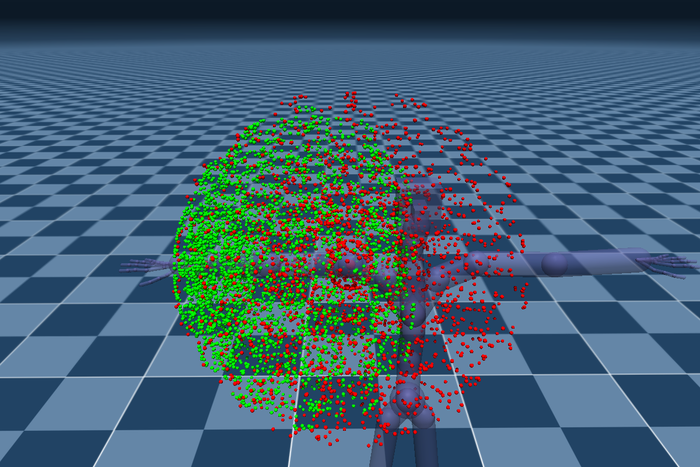

In [65]:
robot_wrist_pos_array = (wrist_pos_array - robot_shoulder_pos) * smplh_arm_length / robot_arm_length + smplh_shoulder_pos

smplh_env.reset() # reset

# Initialize MuJoCo viewer
smplh_env.init_viewer(
    viewer_title='SMPLH',viewer_width=1200,viewer_height=800,
    viewer_hide_menus=True,
)
smplh_env.update_viewer(
    azimuth=177,distance=1.42,elevation=-34,lookat=[0.23,-0.2,1.6],
    VIS_TRANSPARENT=True,
)

while smplh_env.is_viewer_alive():
    smplh_env.plot_traj(smplh_wrist_pos_array,rgba=[1,0,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    smplh_env.plot_traj(robot_wrist_pos_array[::2,:],rgba=[0,1,0,1],plot_line=False,plot_sphere=True,sphere_r=0.005)
    image = smplh_env.grab_image()
    smplh_env.render()

smplh_env.close_viewer()

import mediapy
print("\nRobot: Green, SMPL-H: Red")
mediapy.show_image(image,width=700)